In [12]:
import numpy as np
import sympy as sy
import math
from numpy.random import default_rng
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [13]:
l0 = (np.sqrt(2/3))*np.array([[1,0,0],[0,1,0],[0,0,1]])
l1 = np.array([[0,1,0],[1,0,0],[0,0,0]])
l2 = np.array([[0,-1j,0],[1j,0,0],[0,0,0]])
l3 = np.array([[1,0,0],[0,-1,0],[0,0,0]])
l4 = np.array([[0,0,1],[0,0,0],[1,0,0]])
l5 = np.array([[0,0,-1j],[0,0,0],[1j,0,0]])
l6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
l7 = np.array([[0,0,0],[0,0,-1j],[0,1j,0]])
l8 = (1/math.sqrt(3))*np.array([[1,0,0],[0,1,0],[0,0,-2]])

lam = np.array([l0,l1,l2,l3,l4,l5,l6,l7,l8])
# print('l1=', l1, 'l2=', l2, 'l3=', l3 , 'l4=',l4 ,'l5=',l5 , 'l6=', l6, 'l7=',l7 , 'l8',l8)

In [14]:
Ra = 1e-1*default_rng(42).random(size=100)
Ra1 = 1e-1*default_rng(43).random(size=100)
def matrixdot(A,B):
    return np.trace(A@B)/2

def matrixcoeff(A):
    cr = np.zeros(shape=(9), dtype = 'complex_')
    for n in range(0,9):
        cr[n] = matrixdot(A,lam[n])
    return cr

In [15]:
print(Ra)

[0.0773956  0.04388784 0.08585979 0.0697368  0.00941773 0.09756224
 0.07611397 0.07860643 0.01281136 0.04503859 0.0370798  0.0926765
 0.06438651 0.08227616 0.04434142 0.02272387 0.05545848 0.00638173
 0.08276312 0.06316644 0.07580877 0.0354526  0.0970698  0.08931211
 0.07783835 0.01946387 0.0466721  0.00438038 0.01542895 0.0683049
 0.07447622 0.09675097 0.03258254 0.03704597 0.04695558 0.01894714
 0.01299215 0.04757049 0.02269093 0.0669814  0.04371519 0.08326782
 0.07002651 0.03123666 0.08322598 0.08047644 0.03874784 0.02883281
 0.06824955 0.01397525 0.01999082 0.00073623 0.07869244 0.06648509
 0.07051654 0.0780729  0.04589158 0.05687412 0.0139797  0.01145301
 0.0668403  0.04710962 0.05652361 0.07649989 0.06347183 0.05535794
 0.05592072 0.03039501 0.00308178 0.04367174 0.02145847 0.04085286
 0.08534031 0.02339395 0.00583027 0.02813839 0.02935938 0.06619165
 0.05570322 0.07838982 0.06643135 0.04063869 0.08140204 0.01669729
 0.00227121 0.00900479 0.07223594 0.04618772 0.01612718 0.050104

In [16]:
m_u = 2.16e+6
m_c = 1.27e+9
m_t = 172.69e+9
m_b = 4.18e+9
m_d = 4.67e+6
m_s = 93e+6
m_e = 0.51099e+6
m_mu = 105.6583e+6
m_tau = 1776.86e+6

Mu = (1/m_t)*np.diagflat([m_u,m_c,m_t], 0)
print(Mu)
Md = (1/m_b)*np.diagflat([m_d,m_s,m_b],0)
print(Md)
Ml = (1/m_tau)*np.diagflat([m_e,m_mu,m_tau],0)
print(Ml)

[[1.25079622e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.35421854e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[0.00111722 0.         0.        ]
 [0.         0.0222488  0.        ]
 [0.         0.         1.        ]]
[[2.87580338e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.94634918e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [17]:
C03 = 2*np.sqrt(3/2)*matrixdot(l0, Ml)
print('C_03=',C03)
C33 = 2*matrixdot(l3, Ml)
print('C_33=', C33)

C83 = 2*matrixdot(l8, Ml)
print('C_83',C83)

m3 = 0.05
m1 = (m3*C33+m3*np.sqrt(3)*C83)/2+m3
print('m_1=',m1)

m2 = (m3*np.sqrt(3)*C83-m3*C33)/2+m3
print('m_2=',m2)

print('m_3=',m3)

C_03= 1.0597510721159797
C_33= -0.05917591143928053
C_83 -1.120203240808722
m_1= 1.4379016917476228e-05
m_2= 0.002973174588881508
m_3= 0.05


Para el caso en que $\delta _1 +\delta _2=0$, $\quad \delta _1 - \delta _2=\delta$

In [18]:
Rax = 1e-1*default_rng(40).random(size=100)
def m1m2(x,t):
    return ((x*(C33+C03)-(x+t))/2)

def m2m2(x,t):
    return ((x*(C03-C33)-(x-t))/2)

In [19]:
m1m2(0.05,0)

1.4379016917483167e-05

In [20]:
m2m2(0.05,0)

0.0029731745888815046

Repitiendo el proceso pero ahora incluyendo los valores experimentales $\mathrm{Exp} \Delta m^2_{21}$ y $\mathrm{Exp} \Delta m^2_{32}$ y comparando las gráficas con las calculadas anteriormente

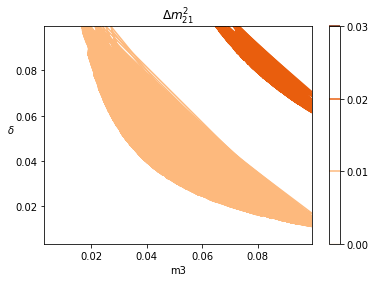

In [21]:
xlist_1 = 1e-1*default_rng(40).random(size=100)
ylist_1 = 1e-1*default_rng(41).random(size=100)

X_1, Y_1 = np.meshgrid(Rax, ylist_1)
Z1_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
fig,ax = plt.subplots()

cp3 = ax.contour(X_1, Y_1, Z1_0, 2, cmap='Oranges')
fig.colorbar(cp3)
ax.set_title('$\Delta m_{21}^2$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)

#plt.savefig("graf5-2.png", dpi=300)
plt.show()

/tmp/ipykernel_24940/2314441762.py:1: RuntimeWarning: invalid value encountered in sqrt
  Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


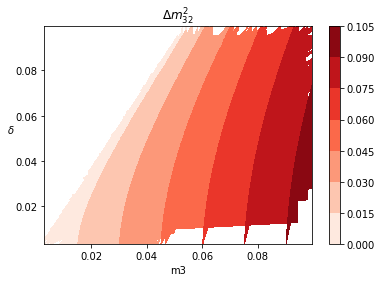

In [22]:
Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)
fig,ax = plt.subplots()

cp4 = ax.contourf(X_1, Y_1, Z1_1, cmap= 'Reds')

fig.colorbar(cp4, extend='both')
ax.set_title('$\Delta m_{32}^2$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)

#plt.savefig("graf5-3.png", dpi=300)
plt.show()

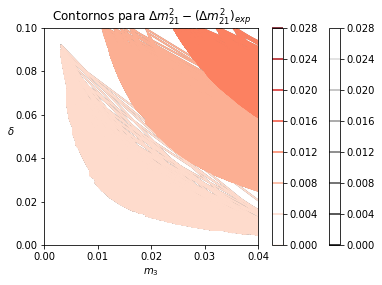

In [23]:
#Para m21 con zoom 
fig,ax = plt.subplots()

Z2_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)

cp5 = ax.contour(X_1, Y_1, Z2_0-7.42e-5, cmap='gray' )
cp6 = ax.contour(X_1, Y_1, (Z2_0-7.42e-5)+0.21e-5, cmap='Reds')
cp7 = ax.contour(X_1, Y_1, (Z2_0-7.42e-5)-0.21e-5, cmap='Reds')

fig.colorbar(cp5)
fig.colorbar(cp6)
ax.set_title('Contornos para $\Delta m_{21}^2 - (\Delta m_{21}^2)_{exp}$')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$',rotation=0)

plt.xlim([0,0.04])
plt.ylim([0,0.1])
#plt.savefig("graf6.png", dpi=300)
plt.show()

/tmp/ipykernel_24940/2134586765.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


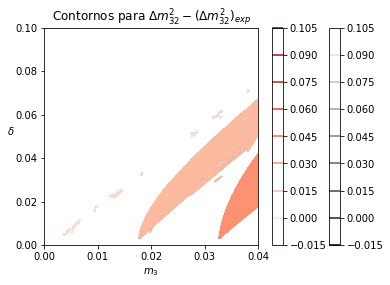

In [24]:
#Para m32 con zoom
fig,ax = plt.subplots()

Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)

cp8 = ax.contour(X_1, Y_1, Z3_0-2.515e-3 ,cmap='gray' )
cp9 = ax.contour(X_1, Y_1, (Z3_0-2.515e-3)+0.028e-3, cmap='Reds')
cp10 = ax.contour(X_1, Y_1, (Z3_0-2.515e-3)-0.028e-3, cmap='Reds')

fig.colorbar(cp8)
fig.colorbar(cp9)
ax.set_title('Contornos para $\Delta m_{32}^2 - (\Delta m_{32}^2)_{exp}$')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$', rotation=0)

plt.xlim([0,0.04])
plt.ylim([0,0.1])
#plt.savefig("graf6-1.png", dpi=300)
plt.show()

/tmp/ipykernel_24940/1988924449.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


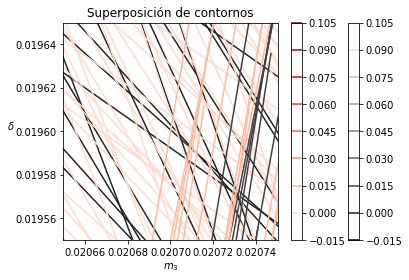

In [25]:
fig,ax=plt.subplots()

Z2_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
Z3_0 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)

cp5 = ax.contour(X_1, Y_1, Z2_0-7.42e-5, cmap='gray' )
cp6 = ax.contour(X_1, Y_1, (Z2_0-7.42e-5)+0.21e-5, cmap='Reds')
cp7 = ax.contour(X_1, Y_1, (Z2_0-7.42e-5)-0.21e-5, cmap='Reds')

cp8 = ax.contour(X_1, Y_1, Z3_0-2.515e-3 ,cmap='gray' )
cp9 = ax.contour(X_1, Y_1, (Z3_0-2.515e-3)+0.028e-3, cmap='Reds')
cp10 = ax.contour(X_1, Y_1, (Z3_0-2.515e-3)-0.028e-3, cmap='Reds')

fig.colorbar(cp8)
fig.colorbar(cp9)
ax.set_title('Superposición de contornos')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$', rotation=0)

#plt.xlim([0.013,0.017])
#plt.ylim([0.026,0.03])
plt.xlim([0.02065,0.02075])
plt.ylim([0.01955,0.01965])
#plt.savefig("graf6-22.png", dpi=300)
plt.show()

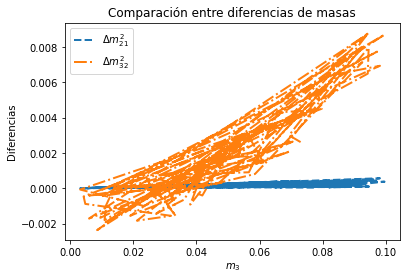

In [29]:
y1 = m2m2(xlist_1,ylist_1)**2-m1m2(xlist_1,ylist_1)**2
y2 = xlist_1**2-m2m2(xlist_1,ylist_1)**2

fig, ax = plt.subplots()

line1, = ax.plot(xlist_1, y1, linewidth=2.0, label='$\Delta m_{21}^2$', linestyle='dashed')
line2, = ax.plot(xlist_1, y2, linewidth=2.0, label='$\Delta m_{32}^2$', linestyle='dashdot')

ax.set_xlabel('$m_3$')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre diferencias de masas')

ax.legend()
#plt.savefig("g6.png", dpi=300)
plt.show()

Majorana Inspired

In [ ]:
x = np.linspace(1e-4,1e-1,100)
r1 = np.linspace(0, 1e-1, 100)
r2 = np.linspace(0, 1e-1, 100)
def m13(x,r1):
    return ((x*r1*(C33+C03)-(x*r1))/2)

def m23(x,r2):
    return ((x*r2*(C03-C33)-(x*r2))/2)

In [ ]:
m13(0.05,1) == m1m2(0.05,0)
m23(0.05,1) == m2m2(0.05,0)

True

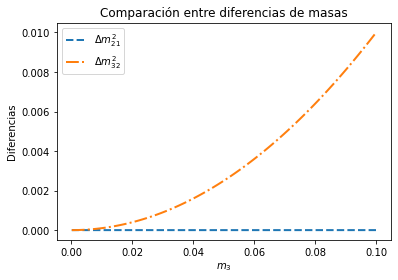

In [ ]:
y1 = m23(x,r2)**2-m13(x,r1)**2
y2 = x**2-m23(x,r2)**2

fig, ax = plt.subplots()

line1, = ax.plot(x, y1, linewidth=2.0, label='$\Delta m_{21}^2$', linestyle='dashed')
line2, = ax.plot(x, y2, linewidth=2.0, label='$\Delta m_{32}^2$', linestyle='dashdot')

ax.set_xlabel('$m_3$')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre diferencias de masas')

ax.legend()
#plt.savefig("graf2.png", dpi=300)
plt.show()

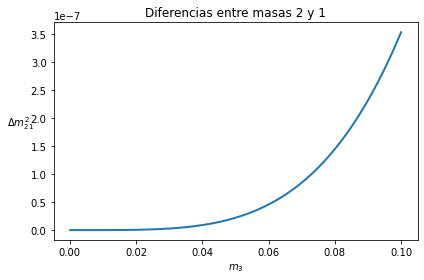

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y1, linewidth=2.0)
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\Delta m_{21}^2$',rotation=0, labelpad=10)
ax.set_title('Diferencias entre masas 2 y 1')

plt.tight_layout()
#plt.savefig("graf3-1.png", dpi=300)
plt.show()

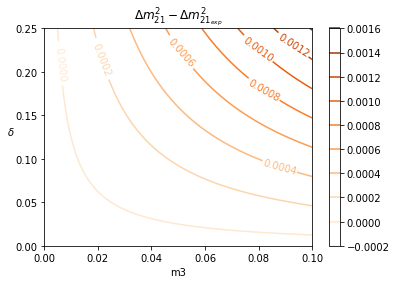

In [ ]:
xlist_2 = np.linspace(0, 1e-1, 100)
ylist_2 = np.linspace(0, 0.25, 100)

X_2, Y_2 = np.meshgrid(xlist_2, ylist_2)
Z0_1 = np.sqrt((m23(X_2,Y_2))**2-m13(X_2,Y_2)**2)
fig,ax = plt.subplots()

cp1_1 = ax.contour(X_2, Y_2, Z0_1-7.42e-5, cmap='Oranges')
ax.clabel(cp1_1, inline=True, fontsize=10)
fig.colorbar(cp1_1)
ax.set_title('$\Delta m_{21}^2 - \Delta m_{21_{exp}}^2$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)

#plt.savefig("graf?.png", dpi=300)
plt.show()

In [ ]:
xlist_2.shape

(100,)

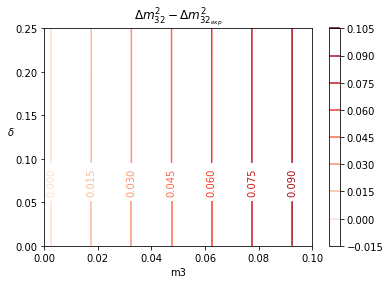

In [ ]:
Z0_2 = np.sqrt(X_2**2-m23(X_2,Y_2)**2)
fig,ax = plt.subplots()

cp2_1 = ax.contour(X_2, Y_2, Z0_2-2.515e-3, cmap= 'Reds')
ax.clabel(cp2_1, inline=True, fontsize=10)

fig.colorbar(cp2_1, extend='both')
ax.set_title('$\Delta m_{32}^2 - \Delta m_{32_{exp}}^2$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)
#plt.savefig("graf5-3.png", dpi=300)
plt.show()

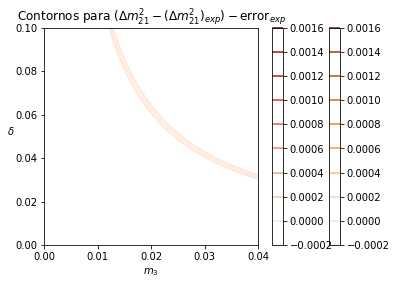

In [ ]:
#Para m21 con zoom 
fig,ax = plt.subplots()

Z0_1 = np.sqrt((m23(X_2,Y_2))**2-m13(X_2,Y_2)**2)

cp1_1 = ax.contour(X_2, Y_2, Z0_1-7.42e-5, cmap='Oranges')
cp1_2 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)+0.21e-5, cmap='Reds')
cp1_3 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)-0.21e-5, cmap='Reds')

fig.colorbar(cp1_1)
fig.colorbar(cp1_2)
ax.set_title('Contornos para $(\Delta m_{21}^2 - (\Delta m_{21}^2)_{exp})-\mathrm{error}_{exp}$')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$',rotation=0)

plt.xlim([0,0.04])
plt.ylim([0,0.1])
#plt.savefig("graf6.png", dpi=300)
plt.show()

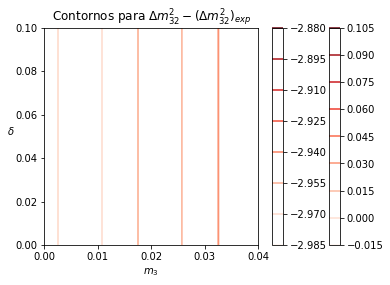

In [ ]:
#Para m21 con zoom 
fig,ax = plt.subplots()

Z0_2 = np.sqrt(X_2**2-m23(X_2,Y_2)**2)

cp2_1 = ax.contour(X_2, Y_2, Z0_2-2.515e-3, cmap= 'Reds')
cp2_2 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)+0.0218-3, cmap='Reds')
cp2_3 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)-0.028e-3, cmap='Reds')

fig.colorbar(cp2_1)
fig.colorbar(cp2_2)
ax.set_title('Contornos para $\Delta m_{32}^2 - (\Delta m_{32}^2)_{exp}$')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$',rotation=0)

plt.xlim([0,0.04])
plt.ylim([0,0.1])
#plt.savefig("graf6.png", dpi=300)
plt.show()

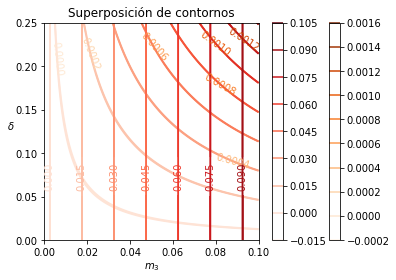

In [ ]:
fig,ax=plt.subplots()

Z0_1 = np.sqrt((m23(X_2,Y_2))**2-m13(X_2,Y_2)**2)
Z0_2 = np.sqrt(X_2**2-m23(X_2,Y_2)**2)

cp1_1 = ax.contour(X_2, Y_2, Z0_1-7.42e-5, cmap='Oranges')
cp1_2 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)+0.21e-5, cmap='Reds')
cp1_3 = ax.contour(X_2, Y_2, (Z0_1-7.42e-5)-0.21e-5, cmap='Reds')
ax.clabel(cp1_1, inline=True, fontsize=10)

cp2_1 = ax.contour(X_2, Y_2, Z0_2-2.515e-3, cmap= 'Reds')
cp2_2 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)+0.028e-3, cmap='Reds')
cp2_3 = ax.contour(X_2, Y_2, (Z0_2-2.515e-3)-0.028e-3, cmap='Reds')
ax.clabel(cp2_1, inline=True, fontsize=10)

fig.colorbar(cp1_1)
fig.colorbar(cp2_1)
ax.set_title('Superposición de contornos')
ax.set_xlabel('$m_3$')
ax.set_ylabel('$\delta$', rotation=0)

#plt.xlim([0,0.04])
#plt.ylim([0.026,0.03])

#plt.savefig("graf6-22.png", dpi=300)
plt.show()

Con randoms

In [ ]:
Ra = default_rng(42).random((3,3))
